In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.family'] = 'serif'
import sys
import os

In [2]:
abs_path = "/scratch/aew492/research-summer2020_output/1D/"

mock_info = np.load(os.path.join(abs_path, "mock_data/2e-4/cat_L750_n2e-4_z057_patchy_As2x_lognormal_rlz400_m-1.000-L_b-0.500.npy"), allow_pickle=True).item()

### Mock Plot

In [3]:
mock_data = mock_info["grad_set"]
L = mock_info["boxsize"]
w_hat = mock_info["w_hat"]

z_max = -200
xy_slice = mock_data[np.where(mock_data[:,2] < z_max)]

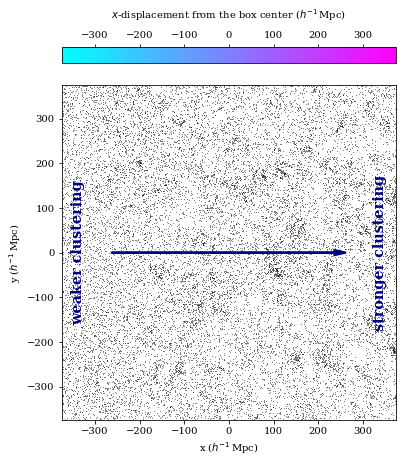

In [4]:
fig, ax = plt.subplots(figsize=(6,8))
plt.plot(xy_slice[:,0], xy_slice[:,1],'k,', alpha=0.5)

lc = "navy"
kwargs = {
    "rotation" : 90,
    "color" : lc,
    "ha" : "center",
    "va" : "center",
    "size" : "x-large",
    "weight" : "bold"
}
# w_hat
a = 0.35*L
plt.arrow(-a, 0, 2*a, 0, color=lc, lw=2, head_width = .045*a, head_length=.1*a, length_includes_head=True, zorder=100)

ax.text(0.45*L, 0, "stronger clustering", **kwargs)
ax.text(-0.45*L, 0, "weaker clustering", **kwargs)
ax.set_aspect("equal")
ax.set_xlim((-L/2, L/2))
ax.set_ylim((-L/2, L/2))
ax.set_xlabel("x ($h^{-1}\,$Mpc)")
ax.set_ylabel("y ($h^{-1}\,$Mpc)")

cmap = plt.cm.get_cmap("cool")
img = plt.imshow(np.array([[-375,375]]), cmap=cmap)
img.set_visible(False)

cbar = plt.colorbar(orientation="horizontal", location="top")
cbar.set_label(r'$x$-displacement from the box center ($h^{-1}\,$Mpc)', labelpad=12)

### Xi in Patches

In [5]:
mock_info = np.load(os.path.join(abs_path, "mock_data/2e-4/cat_L750_n2e-4_z057_patchy_As2x_lognormal_rlz400_m-1.000-L_b-0.500.npy"), allow_pickle=True).item()


In [6]:
patch_info = np.load(os.path.join(abs_path, "patch_data/2e-4/8patches/cat_L750_n2e-4_z057_patchy_As2x_lognormal_rlz400_m-1.000-L_b-0.500.npy"), allow_pickle=True).item()
n_patches = patch_info["n_patches"]
r_avg = patch_info["r_avg"]
xi_patches = patch_info["xi_patches"]
xi_patch_avg = patch_info["xi_patch_avg"]
xi_full = patch_info["xi_full"]
patch_centers = patch_info["patch_centers"]

print(patch_info)

{'n_patches': 8, 'patch_centers': array([[188.47818506, 188.26857813, 187.25721224],
       [187.62969096, 187.80719176, 562.49006304],
       [187.00952816, 563.15463085, 187.79978152],
       [188.02116028, 563.18489392, 562.38654516],
       [563.80497667, 186.73752702, 187.45002879],
       [561.73201023, 186.75167484, 562.04696544],
       [562.71458855, 562.42607472, 186.67149471],
       [562.52407613, 562.82247449, 562.83998195]]), 'r_avg': array([ 22.72727273,  28.18181818,  33.63636364,  39.09090909,
        44.54545455,  50.        ,  55.45454545,  60.90909091,
        66.36363636,  71.81818182,  77.27272727,  82.72727273,
        88.18181818,  93.63636364,  99.09090909, 104.54545455,
       110.        , 115.45454545, 120.90909091, 126.36363636,
       131.81818182, 137.27272727]), 'xi_patches': array([[ 7.81452018e-02,  4.53596860e-02,  1.30922055e-02,
         1.12578434e-02,  2.04036410e-02, -1.90684616e-03,
         1.00498695e-03,  5.89799553e-03,  6.16927358e-04,
    

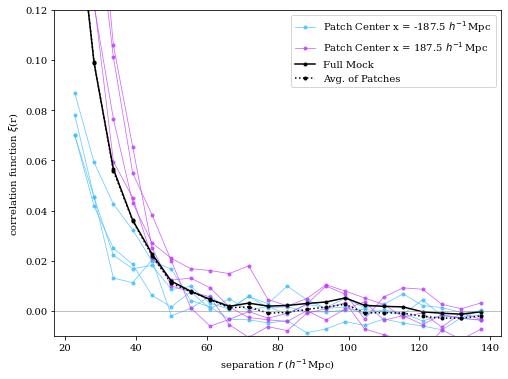

In [7]:
fig, ax = plt.subplots()

#img = plt.imshow(np.array([[-375,375]]), cmap=cmap)
#img.set_visible(False)

#cbar = plt.colorbar(orientation="horizontal", location="top")
#cbar.set_label(r'$x$-displacement from the box center ($h^{-1}\,$Mpc)', labelpad=12)
cmap = plt.cm.get_cmap("cool")

j, k = 0, 0
for i in range(len(patch_centers)):
    center_norm = patch_centers[i,0]/L
    color = cmap(center_norm)
    
    if patch_centers[i,0] < L/2:
        if j == 0:
            label = r"Patch Center x = -187.5 $h^{-1}\,$Mpc"
        else:
            label = None
        j = 1
    else:
        assert patch_centers[i,0] >= L/2
        if k == 0:
            label = r"Patch Center x = 187.5 $h^{-1}\,$Mpc"
        else:
            label = None
        k = 1
    plt.plot(r_avg, xi_patches[i], color=color, marker=".", alpha=0.8, lw=0.75, label=label)
    
plt.plot(r_avg, xi_full, color="black", marker=".", label="Full Mock")
plt.plot(r_avg, xi_patch_avg, color="black", alpha=1, marker=".", ls="dotted", label="Avg. of Patches")

ax.axhline(0, color='grey', lw=0.5)
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi$(r)')
ax.set_ylim((-0.01, 0.12))

plt.legend()

In [8]:
(patch_centers[5,0] + L/2)

936.7320102255213

### Xi, Suave

In [9]:
from Corrfunc.utils import evaluate_xi

In [10]:
suave_info = np.load(os.path.join(abs_path, f"suave_data/2e-4/cat_L750_n2e-4_z057_patchy_As2x_lognormal_rlz400_m-1.000-L_b-0.500.npy"), allow_pickle=True).item()
amps = suave_info["amps"]
r_fine = suave_info["r_fine"]
xi_locs = suave_info["xi_locs"]


In [11]:
v_min = -L/2.
v_max = L/2.
vs_norm = matplotlib.colors.Normalize(vmin=v_min, vmax=v_max)
nvs = 50
vs = np.linspace(v_min, v_max, nvs)

Text(0, 0.5, 'correlation function $\\xi(r)$')

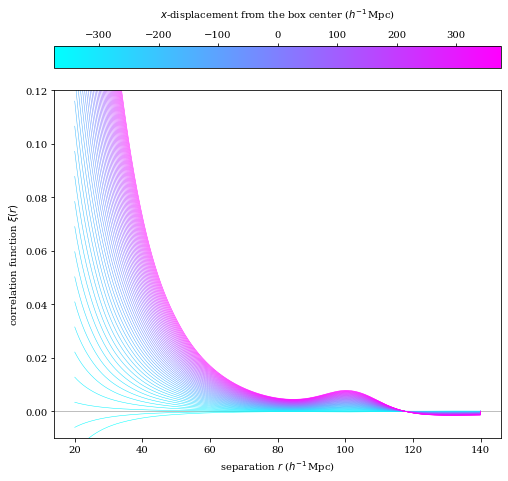

In [12]:
fig, ax = plt.subplots(figsize=(8,8))

ax.axhline(0, color='grey', lw=0.5)

for i, v in enumerate(vs):
    plt.plot(r_fine, xi_locs[i], color=cmap(vs_norm(v)), lw=0.5)
    
sm = plt.cm.ScalarMappable(cmap=cmap, norm=vs_norm)
cbar = plt.colorbar(sm, orientation="horizontal", location="top")
cbar.set_label(r'$x$-displacement from the box center ($h^{-1}\,$Mpc)', labelpad=12)
#cbar.set_label(r'$v \,\, (\mathbf{x} = v\hat{e}_\mathrm{gradient} + \mathbf{x}_\mathrm{pivot})$', rotation=0, labelpad=12)
ax.set_ylim((-0.01, 0.12))
ax.set_xlabel(r'separation $r$ ($h^{-1}\,$Mpc)')
ax.set_ylabel(r'correlation function $\xi(r)$')

### Standard vs CFE

In [13]:
sys.path.insert(0, "/home/aew492/research-summer2020/code")
import patches_vs_suave_stats

grads = patches_vs_suave_stats.extract_grads_patches_suave()
grads_exp = grads["grads_exp"]
grads_rec_patches = grads["grads_rec_patches"]
grads_rec_suave = grads["grads_rec_suave"]

suave std:  0.00033010512900423934
patches std:  0.0010826767504382943
suave std:  0.00040180043110926326
patches std:  0.001201730489588701
suave std:  0.0004098751799935326
patches std:  0.0011366361083472879


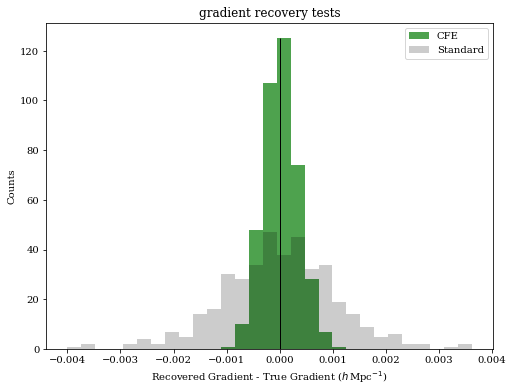

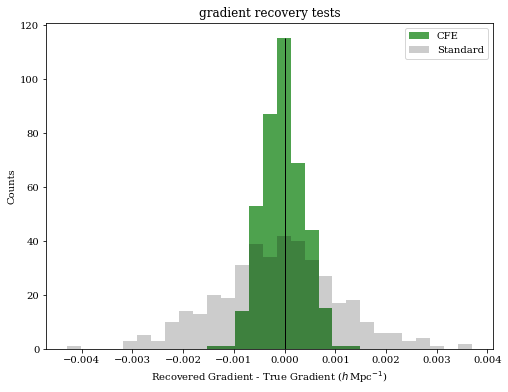

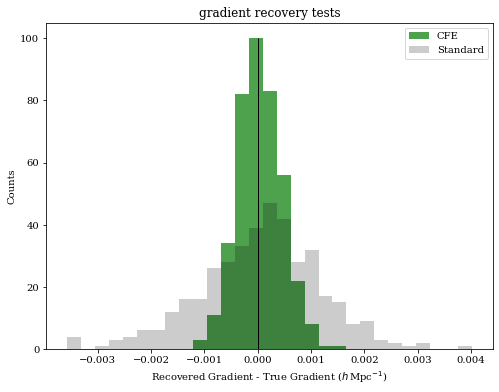

In [14]:
dim = {
        0 : "x",
        1 : "y",
        2 : "z"
        }

nbins = 30

for i in dim:
    fig, ax = plt.subplots()
    ax.set_xlabel("Recovered Gradient - True Gradient ($h\,$Mpc$^{-1}$)")
    ax.set_ylabel("Counts")
    ax.set_title("gradient recovery tests")

    suave_vals = grads_rec_suave[:,i]-grads_exp[:,i]
    patches_vals = grads_rec_patches[:,i]-grads_exp[:,i]
    
    print("suave std: ", np.std(suave_vals))
    print("patches std: ", np.std(patches_vals))

    bins = np.linspace(min(min(patches_vals), min(suave_vals)), max(max(patches_vals), max(suave_vals)), nbins)
    n_s, _, _ = plt.hist(suave_vals, bins=bins, color="forestgreen", alpha=0.8, label="CFE")
    n_p, _, _ = plt.hist(patches_vals, bins=bins, color="black", alpha=0.2, label="Standard", zorder=100)

    plt.vlines(0, 0, max(max(n_s), max(n_p)), color="black", alpha=1, zorder=101, linewidth=1)
    #plt.axvline(1/3000)

    plt.legend()

In [15]:
suave_vals = grads_rec_suave[:,0]-grads_exp[:,0]
patches_vals = grads_rec_patches[:,0]-grads_exp[:,0]
s_std = np.std(suave_vals)
p_std = np.std(patches_vals)
print(s_std)
print(p_std)
print(p_std/s_std)

0.00033010512900423934
0.0010826767504382943
3.2797937847987515


In [16]:
np.median(suave_vals)

5.624278261681572e-06

In [17]:
np.median(patches_vals)

3.888773081778905e-06

In [18]:
grads_exp_norm = np.linalg.norm(grads_exp, axis=1)
grads_rec_p_norm = np.linalg.norm(grads_rec_patches, axis=1)
grads_rec_s_norm = np.linalg.norm(grads_rec_suave, axis=1)

suave_vals_norm = grads_rec_s_norm - grads_exp_norm
patches_vals_norm = grads_rec_p_norm - grads_exp_norm

In [19]:
s = np.std(suave_vals_norm)
p = np.std(patches_vals_norm)
print(s)
print(p)
print(p/s)

0.00032189388709565357
0.0009889003703365399
3.072131562544024


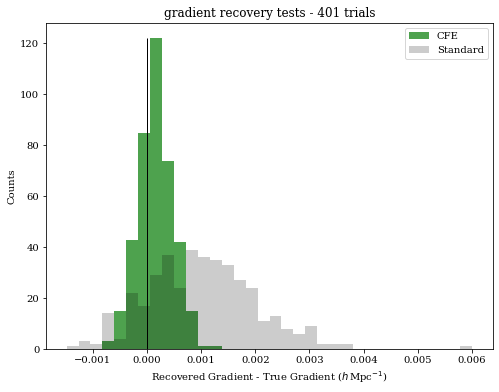

In [20]:
fig1, ax1 = plt.subplots()
ax1.set_xlabel("Recovered Gradient - True Gradient ($h\,$Mpc$^{-1}$)")
ax1.set_ylabel("Counts")
ax1.set_title("gradient recovery tests - 401 trials")
nbins = 35
bins = np.linspace(min(min(patches_vals_norm), min(suave_vals_norm)), max(max(patches_vals_norm), max(suave_vals_norm)), nbins)
n_s, _, _ = plt.hist(suave_vals_norm, bins=bins, color="forestgreen", alpha=0.8, label="CFE")
n_p, _, _ = plt.hist(patches_vals_norm, bins=bins, color="black", alpha=0.2, label="Standard", zorder=100)
plt.vlines(0, 0, max(max(n_s), max(n_p)), color="black", alpha=1, zorder=101, linewidth=1)
plt.legend()

In [21]:
.17/.06

2.8333333333333335